<a href="https://colab.research.google.com/github/YuvalRozner/BetterWeather/blob/main/Data_Manipulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [21]:
#loading data
url = 'https://raw.githubusercontent.com/YuvalRozner/BetterWeather/main/data/JER_data.csv'
df = pd.read_csv(url)
df.head()

<ipython-input-21-ae7c9b13109a>:3: DtypeWarning: Columns (1,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,Date Time,BP (hPa),DiffR (w/m^2),Grad (w/m^2),NIP (w/m^2),RH (%),TD (degC),TDmax (degC),TDmin (degC),WD (deg),WDmax (deg),WS (m/s),Ws1mm (m/s),Ws10mm (m/s),WSmax (m/s),STDwd (deg)
0,01/01/2000 00:00,-,NaN,NaN,NaN,-,17.3,17.4,17.3,102,97,1.6,2.4,1.7,2.8,9.8
1,01/01/2000 00:10,-,NaN,NaN,NaN,-,17.3,17.4,17.3,100,101,1.9,2.2,1.9,2.4,11.0
2,01/01/2000 00:20,-,NaN,NaN,NaN,-,17.3,17.3,17.3,89,88,1.9,2.1,2,2.4,9.9
3,01/01/2000 00:30,-,NaN,NaN,NaN,-,17.4,17.4,17.3,77,76,2.4,2.9,2.4,3.6,10.2
4,01/01/2000 00:40,-,NaN,NaN,NaN,-,17.3,17.4,17.1,73,85,2.6,2.8,2.6,3.2,8.9


In [22]:
# Slice [start:stop:step], starting from index 5 take every 6th record.
df = df[::6]
df = df.drop(columns=['NIP (w/m^2)'])
df = df.drop(columns=['DiffR (w/m^2)'])
df = df.drop(columns=['Grad (w/m^2)'])

date_time = pd.to_datetime(df.pop('Date Time'), format="%d/%m/%Y %H:%M")

df = df.apply(pd.to_numeric, errors='coerce')

df.head()

,BP (hPa),RH (%),TD (degC),TDmax (degC),TDmin (degC),WD (deg),WDmax (deg),WS (m/s),Ws1mm (m/s),Ws10mm (m/s),WSmax (m/s),STDwd (deg)
0,NaN,NaN,17.3,17.4,17.3,102.0,97.0,1.6,2.4,1.7,2.8,9.8
6,NaN,NaN,17.0,17.0,16.9,79.0,58.0,2.1,2.9,2.2,3.6,14.2
12,NaN,NaN,17.3,17.3,17.2,94.0,92.0,1.7,2.1,2.1,2.4,16.2
18,NaN,NaN,16.7,16.8,16.7,81.0,75.0,1.5,1.8,1.9,2.0,8.6
24,NaN,NaN,16.6,16.6,16.5,93.0,84.0,1.8,2.0,1.8,2.4,9.6


In [23]:
mpl.rcParams['figure.figsize'] = (14, 40)
mpl.rcParams['axes.grid'] = False

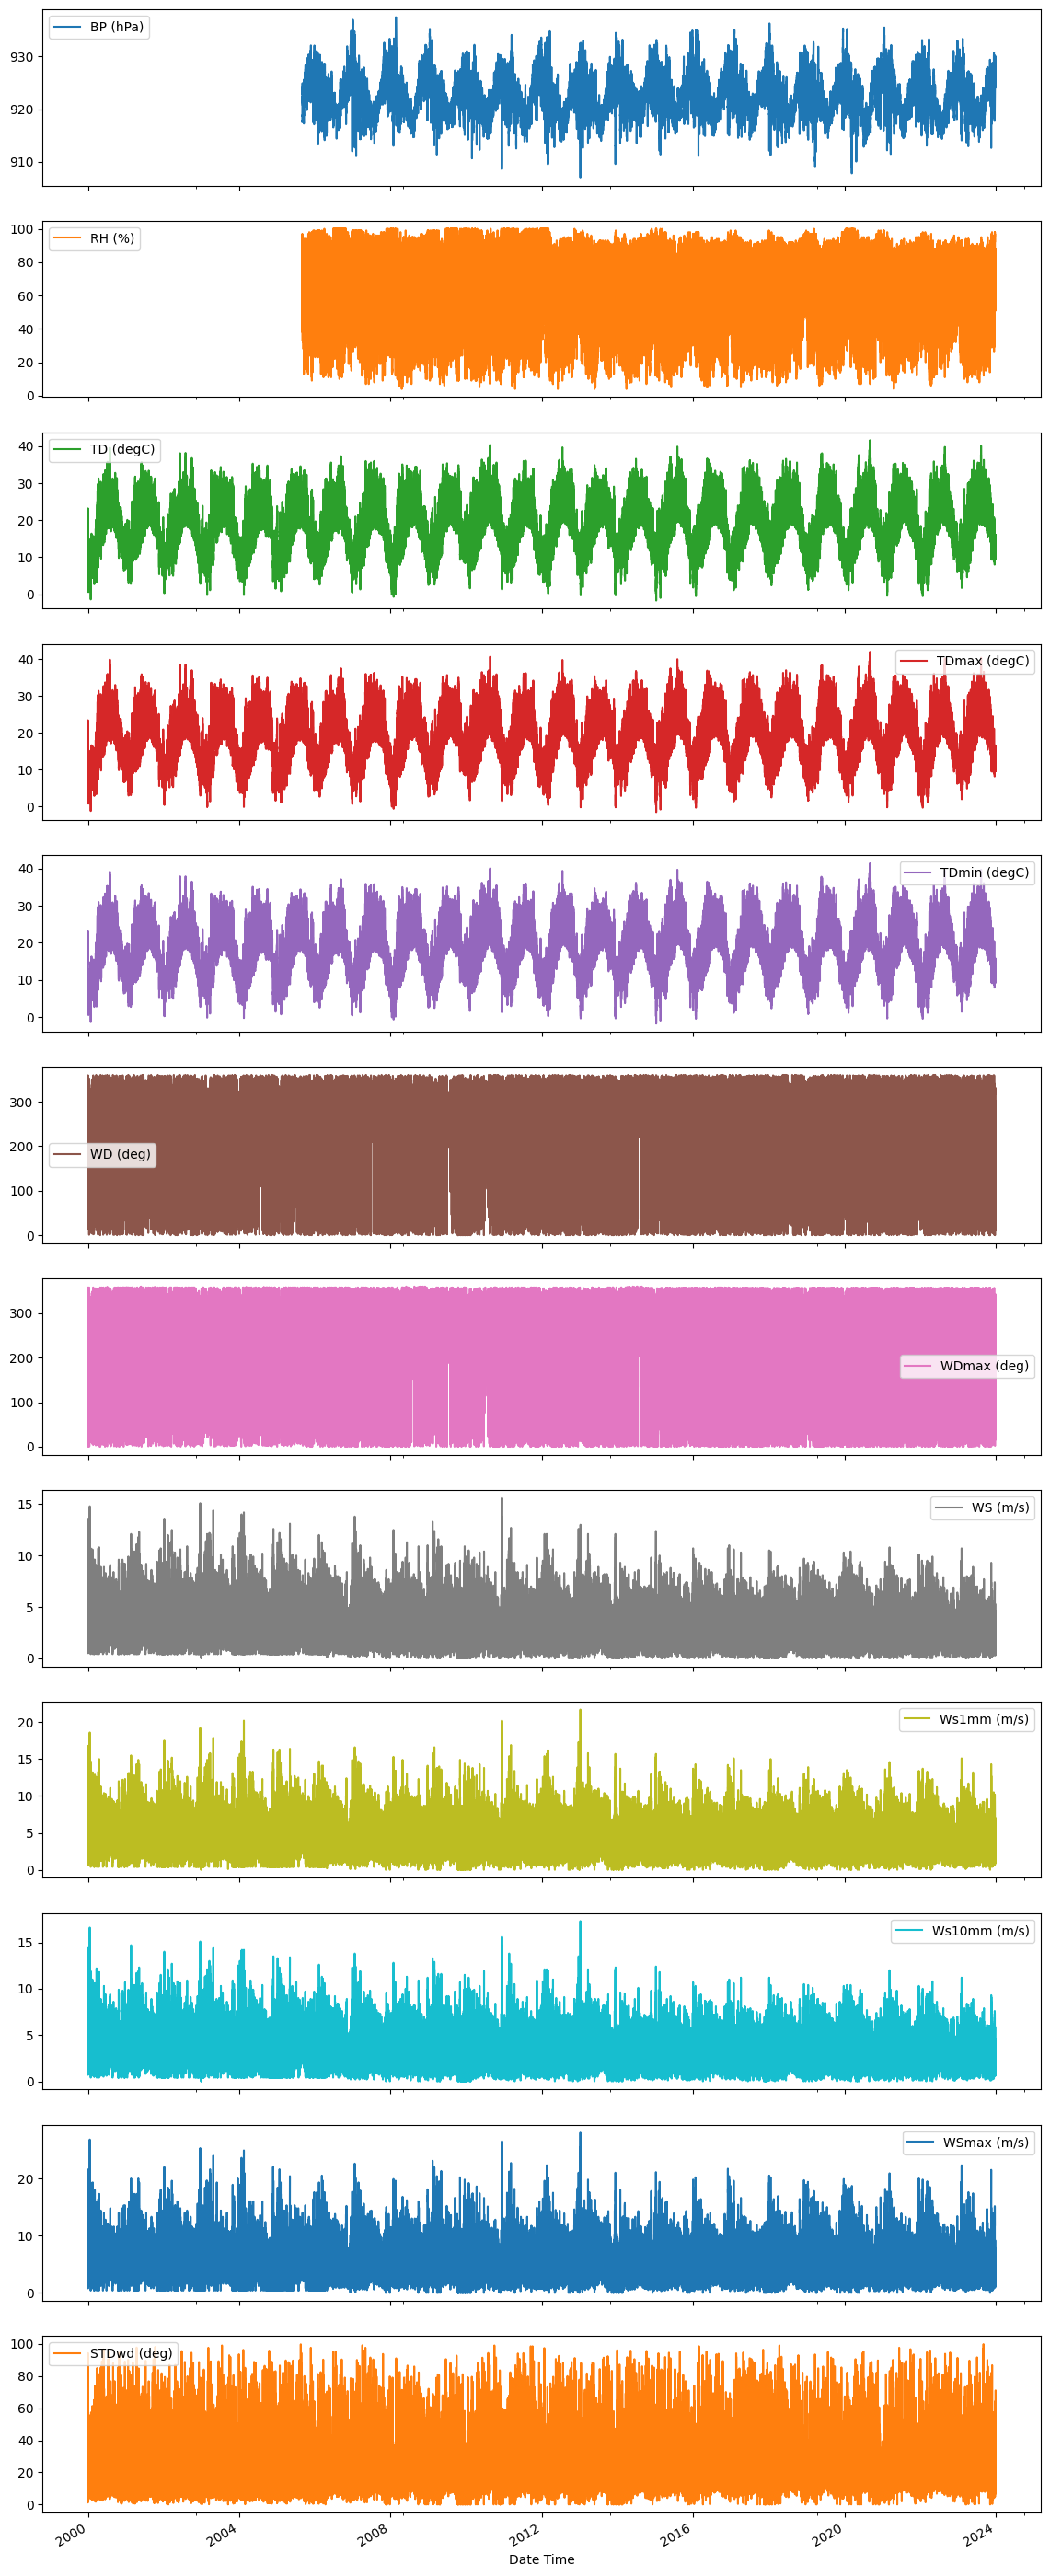

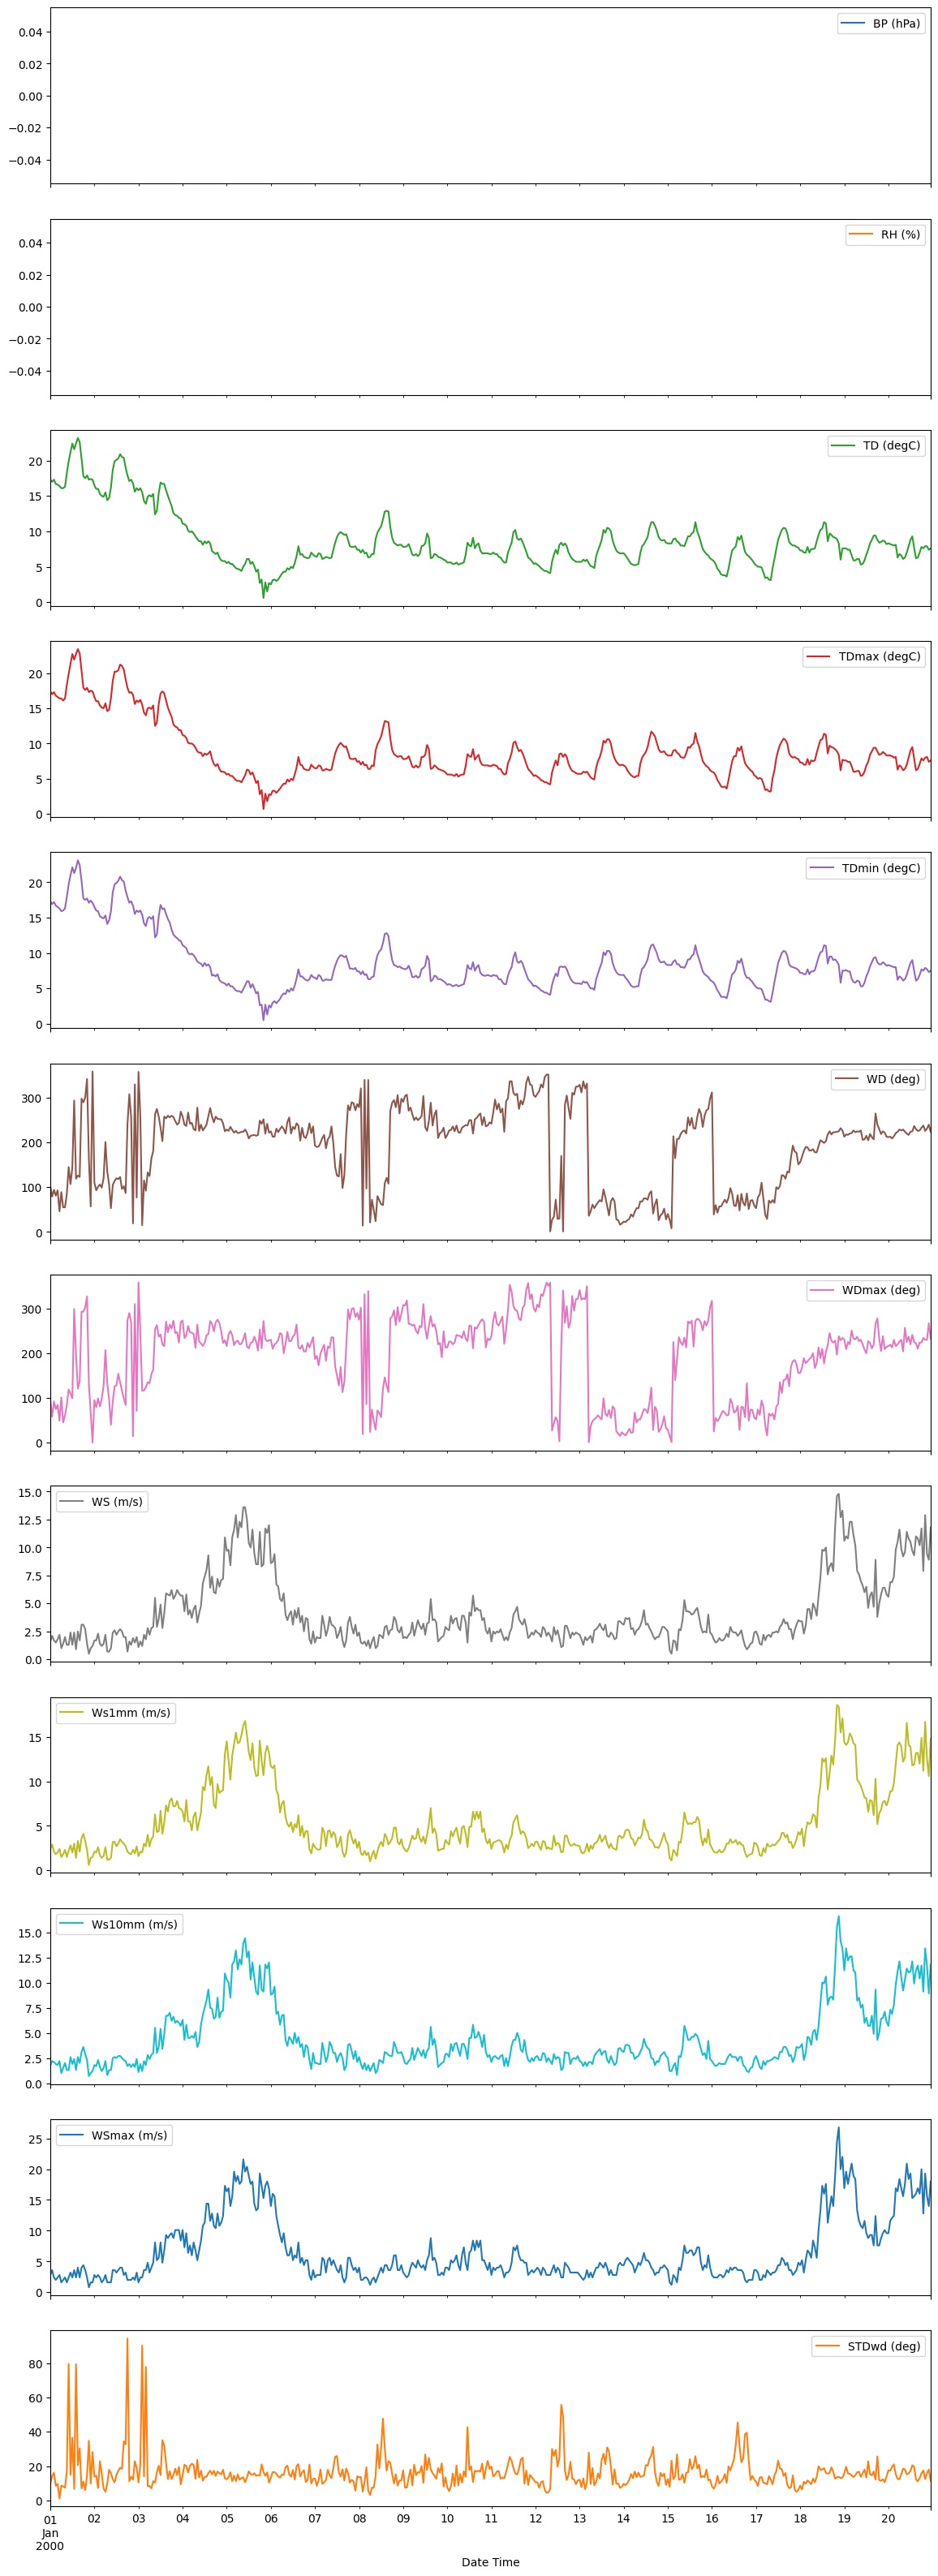

In [24]:
#plot_cols = ['WD (deg)', 'TD (degC)']
plot_cols = df.columns
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BP (hPa),160487.0,922.490836,3.683396,907.04,919.76,922.3,924.93,937.44
RH (%),160231.0,57.103195,24.117456,4.00,37.00,56.0,79.00,100.00
TD (degC),209755.0,17.955506,7.041178,-1.70,12.10,18.3,23.30,41.60
TDmax (degC),209760.0,18.084489,7.084270,-1.60,12.30,18.4,23.40,42.00
TDmin (degC),209757.0,17.829548,6.999501,-1.80,12.00,18.2,23.10,41.40
WD (deg),209910.0,236.100962,90.439883,0.00,180.00,273.0,300.00,360.00
WDmax (deg),209856.0,235.435832,92.249904,0.00,173.00,273.0,301.00,360.00
WS (m/s),209652.0,3.336034,1.635589,0.00,2.10,3.2,4.30,15.60
Ws1mm (m/s),209647.0,4.489605,2.079202,0.00,3.00,4.3,5.70,21.70
Ws10mm (m/s),209655.0,3.590693,1.685942,0.00,2.40,3.4,4.60,17.30


In [26]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

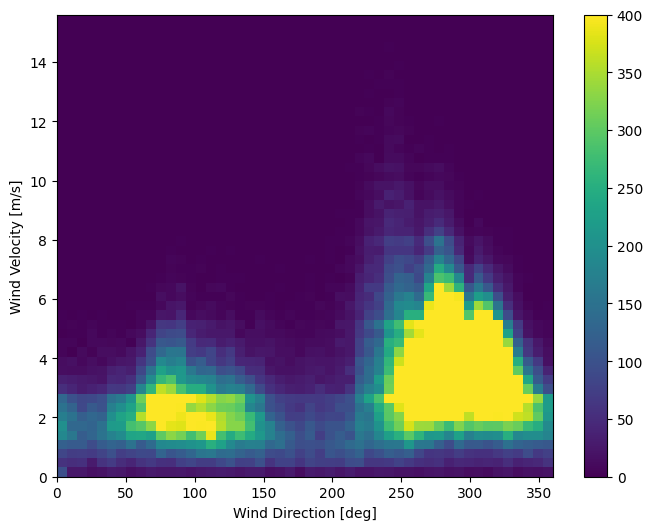

In [27]:
# Use boolean indexing to filter out NaN values for plotting
mask = ~np.isnan(df['WD (deg)']) & ~np.isnan(df['WS (m/s)'])

# Create the 2D histogram plot
plt.hist2d(df['WD (deg)'][mask], df['WS (m/s)'][mask], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')
plt.show()

In [28]:
print(df.columns)


Index(['BP (hPa)', 'RH (%)', 'TD (degC)', 'TDmax (degC)', 'TDmin (degC)',
       'WD (deg)', 'WDmax (deg)', 'WS (m/s)', 'Ws1mm (m/s)', 'Ws10mm (m/s)',
       'WSmax (m/s)', 'STDwd (deg)'],
      dtype='object')


In [30]:
ws = df.pop('WS (m/s)')
max_ws = df.pop('WSmax (m/s)')

# Convert to radians.
wd_rad = df.pop('WD (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = ws*np.cos(wd_rad)
df['Wy'] = ws*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_ws*np.cos(wd_rad)
df['max Wy'] = max_ws*np.sin(wd_rad)

(-10.502361084944306, 7.44781847254617, -14.464068131241882, 8.89363423045623)

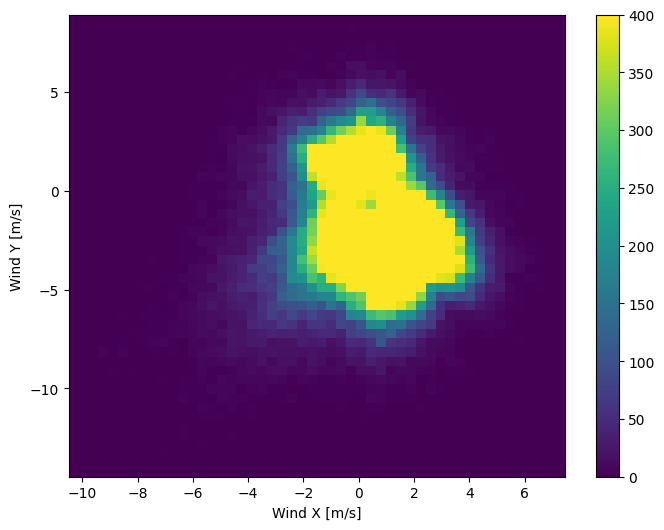

In [31]:
# Use boolean indexing to filter out NaN values for plotting
mask = ~np.isnan(df['Wx']) & ~np.isnan(df['Wy'])

plt.hist2d(df['Wx'][mask], df['Wy'][mask], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

#### Time

Similarly, the `Date Time` column is very useful, but not in this string form. Start by converting it to seconds:

In [32]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

Similar to the wind direction, the time in seconds is not a useful model input. Being weather data, it has clear daily and yearly periodicity. There are many ways you could deal with periodicity.

You can get usable signals by using sine and cosine transforms to clear "Time of day" and "Time of year" signals:

In [33]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

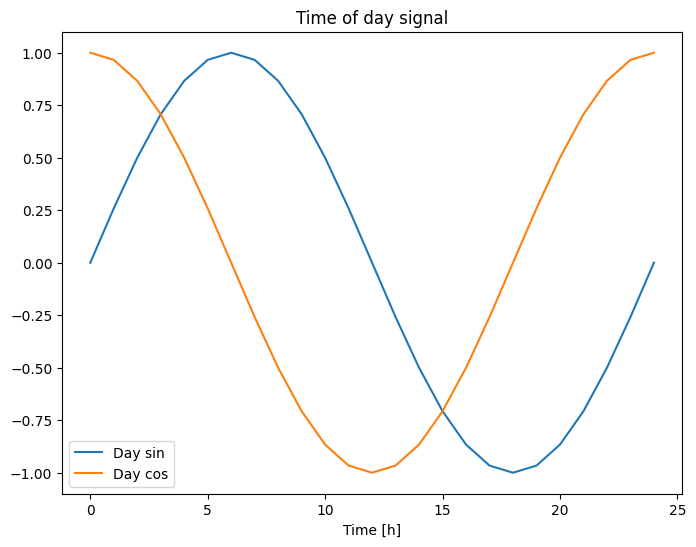

In [39]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.legend(['Day sin', 'Day cos'])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

This gives the model access to the most important frequency features. In this case you knew ahead of time which frequencies were important.

If you don't have that information, you can determine which frequencies are important by extracting features with <a href="https://en.wikipedia.org/wiki/Fast_Fourier_transform" class="external">Fast Fourier Transform</a>. To check the assumptions, here is the `tf.signal.rfft` of the temperature over time. Note the obvious peaks at frequencies near `1/year` and `1/day`:


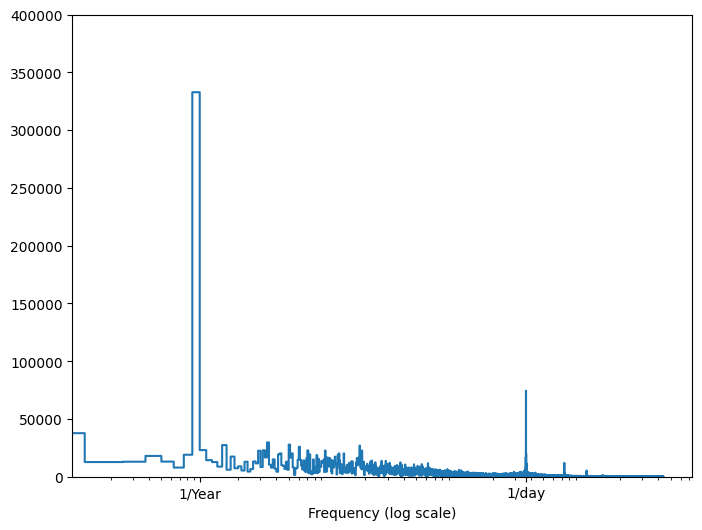

In [ ]:
fft = tf.signal.rfft(df['T (degC)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')